#### Trabalho 1 - Caracterizando redes com o graph-tool - Entrega e apresentação: 16/9 - Pós-Graduação (apenas entrega): 21/10
Nesta tarefa você deve instalar e se familiarizar como graph-tool que é um módulo Python (eficiente) para manipular e analisar redes, ou algum outro software para manipular redes, como o NetworkX ou o Gephi que é uma excelente ferramenta para desenhar redes. Você deve escolher ao menos quatro redes disponíveis nos repositórios abaixo ou em outros repositórios (e não apenas as redes disponíveis no graph-tool), e caracterizá-las utilizando diferentes métricas, como grau, distância, tamanho das componentes conexas, e outras (você pode escolher outras). Para cada métrica analisada, calcule as seguintes estatísticas: 

* máximo
* mínimo
* média
* mediana
* desvio padrão
* e distribuição empírica (faça um gráfico).

### Dataset 0 - protein network
* retirado dos datasets do [livro do Barabási](http://networksciencebook.com/translations/en/resources/data.html)

*Network representing the protein-protein interactions in yeast. Each node represents a protein, and they are connected if they physically interact within the cell.*

Original data: [Yu, H., Braun, P., Yam, M. A., Lemmens, I., Venkatesan, K., Sahalie, J., ... & Vidal, M. (2008). High-quality binary protein interaction map of the yeast interactome network. Science, 322(5898), 104-110.](http://interactome.dfci.harvard.edu/S_cerevisiae/index.php?page=download)

In [68]:
import sys
import pandas as pd
import networkx as nx
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from math import log
from decimal import Decimal

plt.style.use("seaborn")

In [77]:
# Carregando o dataset
df = pd.read_csv("data/protein.edgelist.txt", sep="\t")
df.columns = ("source", "target")
G = nx.from_pandas_edgelist(df)

In [10]:
len(G.nodes), len(G.edges)

(2017, 2929)

In [6]:
# Carregando dataframe de graus
degrees = pd.DataFrame.from_dict(dict(G.degree), orient="index")
degrees.columns = ["degree"]
degrees.index.name = "node"
degrees.sort_values(by="degree", inplace=True)

### Métricas para grau

In [126]:
# 5 graus de maior tamanho
degrees["degree"].nlargest()

node
1356    91
1400    82
1637    81
1017    52
528     46
Name: degree, dtype: int64

In [107]:
# 5 graus de menor tamanho
degrees["degree"].value_counts()

1     974
2     414
3     204
4     135
5      67
6      56
7      35
8      35
9      19
10     12
11     11
12     10
15      6
14      4
20      4
18      4
29      4
13      4
21      3
26      2
91      1
16      1
82      1
22      1
23      1
24      1
30      1
32      1
37      1
42      1
46      1
52      1
81      1
17      1
Name: degree, dtype: int64

In [16]:
# 5 que mais ocorrem
degrees["degree"].value_counts()[:20]

1     974
2     414
3     204
4     135
5      67
6      56
7      35
8      35
9      19
10     12
11     11
12     10
15      6
14      4
20      4
18      4
29      4
13      4
21      3
26      2
Name: degree, dtype: int64

In [11]:
# Média
degrees["degree"].mean()

2.9043133366385723

In [12]:
# Mediana
degrees["degree"].median()

2.0

In [18]:
# Desvio padrão
degrees["degree"].std()

4.884099793274124

In [40]:
# Criando um vetor contendo o tamanho das componentes conexas
cc = pd.Series([len(i) for i in nx.connected_components(G)])

In [44]:
cc.median()

2.0

In [32]:
nx.number_connected_components(G)

185

In [61]:
largest_cc = max(nx.connected_components(G), key=len)
CC = G.subgraph(largest_cc).copy()

In [65]:
nx.diameter(CC)

14

In [70]:
'%.2E' % Decimal(nx.density(G))

'1.44E-03'

In [71]:
nx.density(G)

0.001440631615396117

In [50]:
degrees["degree"].nlargest()

node
1356    91
1400    82
1637    81
1017    52
528     46
Name: degree, dtype: int64

In [113]:
def plot(data,filename,dataset):
    # Adapted from 
    # https://gist.github.com/yamaguchiyuto/504eb5482fc73f046f6b
   
    """ Plot Distribution """
    plt.plot(range(len(data)),data,'go')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Freq')
    plt.xlabel(f'Degree - {dataset} dataset')
    plt.savefig(filename + '_' + dataset + '_distribution.png')
    plt.clf()

    """ Plot CDF """
    s = float(data.sum())
    cdf = data.cumsum(0)/s
    plt.plot(range(len(cdf)),cdf,'go')
    plt.xscale('log')
    plt.ylim([0,1])
    plt.ylabel('CDF')
    plt.xlabel(f'Degree - {dataset} dataset')
    plt.savefig(filename + '_' + dataset + '_cdf.png')
    plt.clf()

    """ Plot CCDF """
    ccdf = 1-cdf
    plt.plot(range(len(ccdf)),ccdf,'go')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim([0,1])
    plt.ylabel('CCDF')
    plt.xlabel(f'Degree - {dataset} dataset')
    plt.savefig(filename + '_' + dataset + '_ccdf.png')
    plt.clf()
    
edgelist_file = "data/metabolic.edgelist.txt"

""" Load graph """
df = pd.read_csv(edgelist_file, sep="\t")
df.columns = ("source", "target")
G = nx.from_pandas_edgelist(df)

""" To sparse adjacency matrix """
M = nx.to_scipy_sparse_matrix(G)

indegrees = M.sum(0).A[0]
outdegrees = M.sum(1).T.A[0]
indegree_distribution = np.bincount(indegrees)
outdegree_distribution = np.bincount(outdegrees)

plot(indegree_distribution, edgelist_file, 'metabolic',)
#plot(indegree_distribution, edgelist_file, 'metabolic',)

/home/vini/anaconda3/envs/nx/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


<Figure size 576x396 with 0 Axes>

### Conjunto 2 - metabolic

Metabólitos de *E. coli*

In [89]:
nx.write_graphml(G, "data/g1_graphml")

In [91]:
df2 = pd.read_csv("data/metabolic.edgelist.txt", sep="\t")
df2.columns = ("source", "target")

G2 = nx.from_pandas_edgelist(df2, create_using=nx.DiGraph)

In [94]:
d2 = pd.DataFrame.from_dict(dict(G2.degree), orient="index")
d2.columns = ["degree"]
d2.index.name = "node"
d2.sort_values(by="degree", inplace=True)

In [98]:
# Número de vértices
len(G2.degree)

1039

In [100]:
len(G2.edges)

5801

In [102]:
d2["degree"].nlargest()

node
589    906
592    522
316    337
819    289
249    279
Name: degree, dtype: int64

In [108]:
d2["degree"].nsmallest()

node
616    1
523    1
105    2
901    2
835    2
Name: degree, dtype: int64

In [109]:
d2["degree"].mean()

11.1665062560154

In [110]:
d2["degree"].median()

6.0

In [112]:
d2["degree"].std()

37.621456418663236

In [118]:
'%.2E' % Decimal(nx.density(G2))

'5.38E-03'

In [128]:
nx.is_strongly_connected(G2), nx.number_strongly_connected_components(G2)

(False, 147)

In [131]:
largest_cc2 = max(nx.strongly_connected_components(G2), key=len)
CC2 = G2.subgraph(largest_cc2).copy()

In [138]:
CC2.number_of_nodes(), CC2.number_of_edges()

(893, 5435)

In [129]:
nx.is_weakly_connected(G2), nx.number_weakly_connected_components(G2)

(True, 1)

In [137]:
nx.diameter(CC2)

8

In [140]:
nx.barycenter(CC2)

[592]

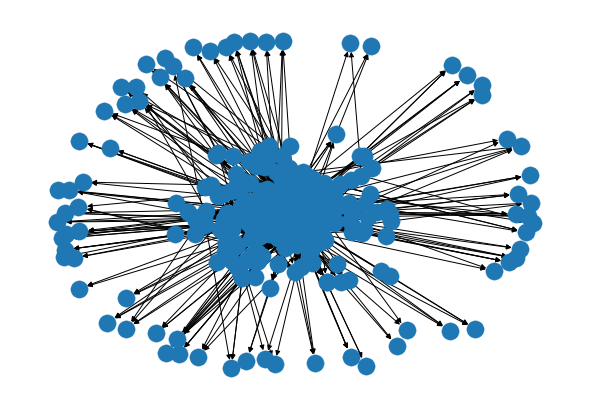

In [86]:
nx.draw(G2)